In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
61.9       1
62.3       1
91.2       1
69.7       1
81.5       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [5]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [6]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [7]:
pr['poverty_rate'] = pr.poverty_rate.astype('float')

In [8]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

Text(0.5,1,'Poverty Rate Given States')

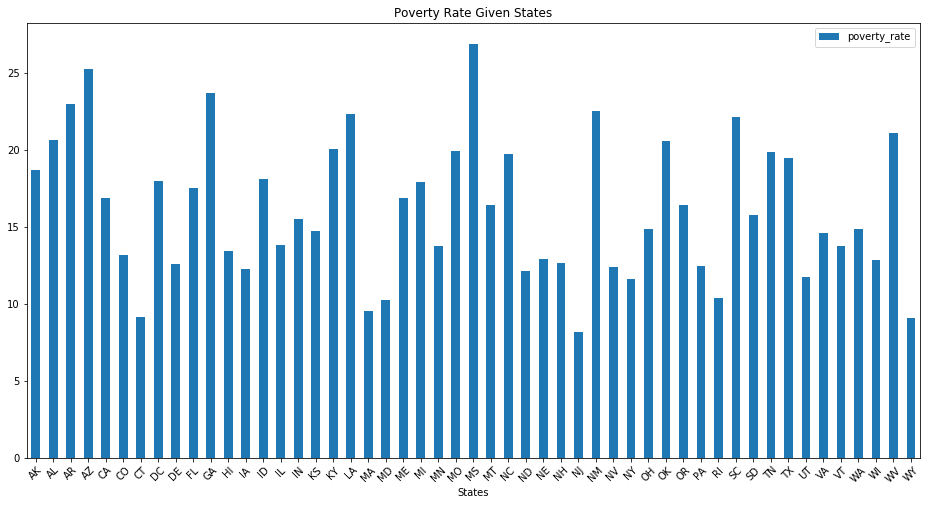

In [9]:
pr.groupby('Geographic Area').agg({'poverty_rate':'mean'}).plot(kind='bar',figsize=(16,8),rot=45)
plt.xlabel('States')
plt.title('Poverty Rate Given States')

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

In [17]:
sorted_pr = pr.groupby('Geographic Area').agg({'poverty_rate':'mean'}).reset_index().sort_values(by= 'poverty_rate', ascending=False)

Text(0.5,1,'Poverty Rate Given States')

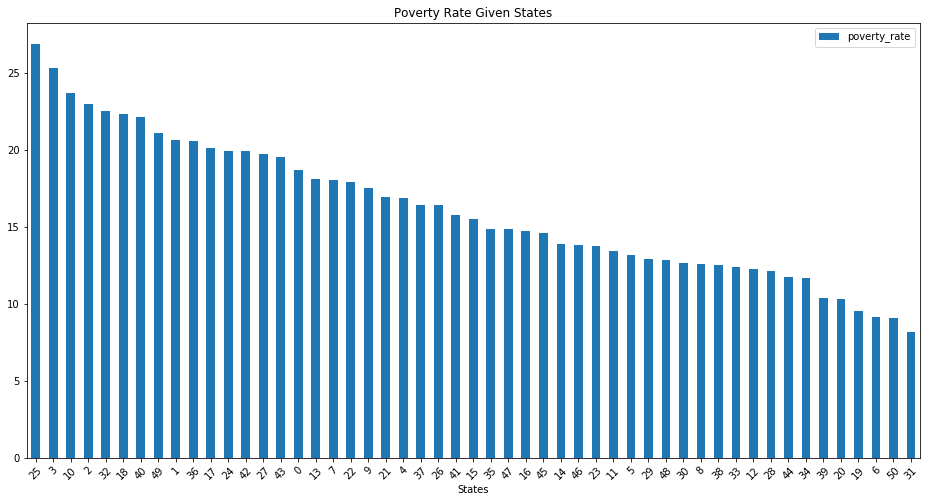

In [18]:
sorted_pr.plot(kind='bar',figsize=(16,8),rot=45)
plt.xlabel('States')
plt.title('Poverty Rate Given States')

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [19]:
pr_ = pr.groupby('Geographic Area')[['poverty_rate']].mean().reset_index().sort_values(by= 'poverty_rate', ascending=False)

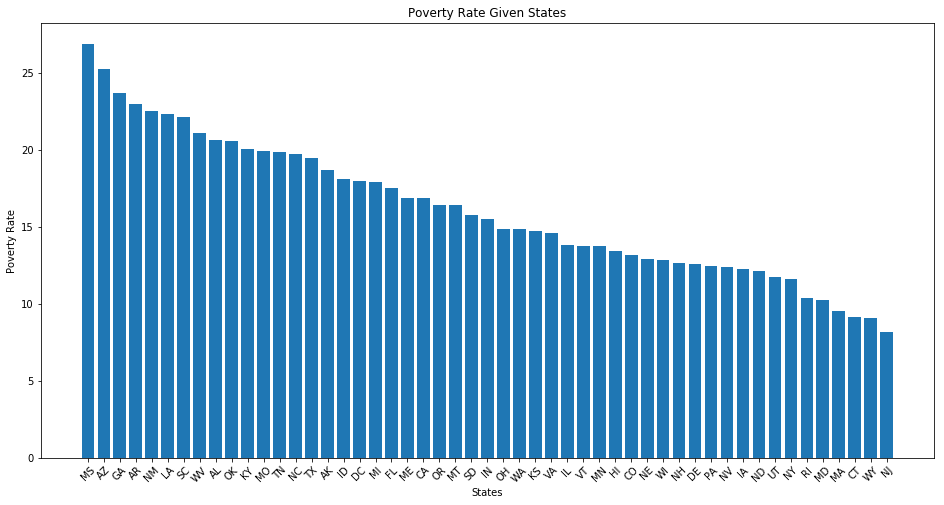

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
langs = pr_['Geographic Area']
students = pr_['poverty_rate']
ax.bar(langs,students)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')
plt.xticks(rotation=45)
plt.show()

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

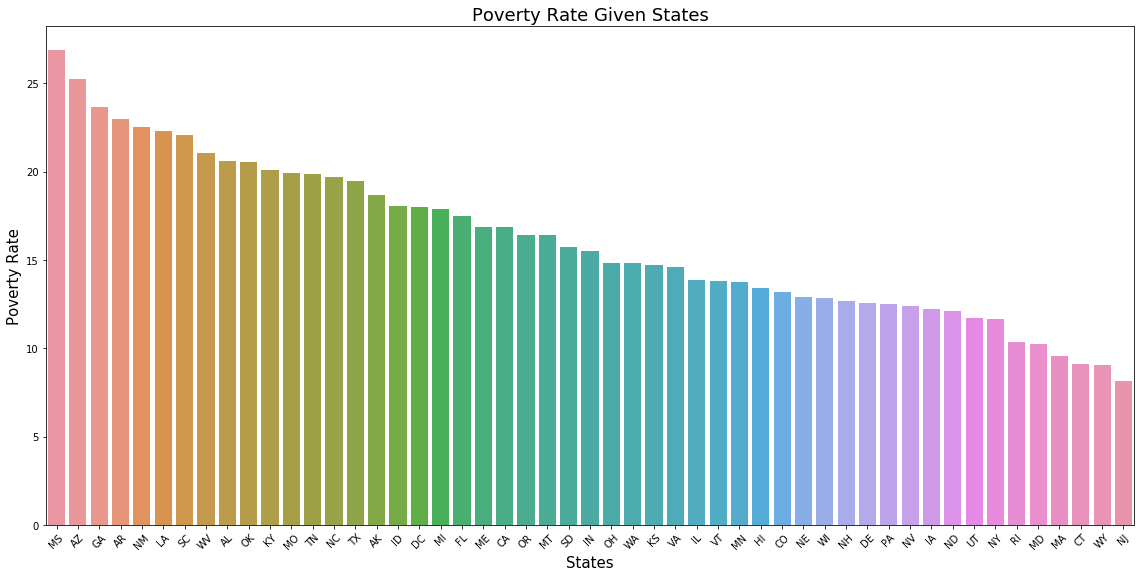

In [21]:
plt.figure(figsize=(16,8))
# make barplot
sns.barplot(x='Geographic Area', y="poverty_rate", data=pr_)# set labels
plt.xlabel("States", size=15)
plt.ylabel("Poverty Rate", size=15)
plt.title("Poverty Rate Given States", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=45);

## 2. Most common 15 Name or Surname of killed people 

In [22]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [23]:
# new data frame with split value columns
kill.name.value_counts()

TK TK                   49
TK Tk                    2
Michael Brown            2
Eric Harris              2
Michael Johnson          2
                        ..
Jimmy Briggs             1
Christopher Olmstead     1
Jeffrey Adkins           1
Terrance  Kellom         1
Scott MacIntosh          1
Name: name, Length: 2481, dtype: int64

In [24]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
new = kill["name"][kill.name != 'TK TK'].str.split(" ", n = 1, expand = True)

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [25]:
# making separate first name column from new data frame 
kill["First Name"]= new[0]
# making separate last name column from new data frame 
kill["Last Name"]= new[1] 

In [26]:
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Last Name
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero


In [27]:
kill["First Name"].value_counts().nlargest(15)

Michael        75
James          47
David          46
William        42
Robert         40
John           39
Christopher    35
Daniel         35
Joseph         34
Richard        32
Joshua         27
Jose           27
Jason          24
Charles        23
Matthew        22
Name: First Name, dtype: int64

In [28]:
pair = kill["First Name"].value_counts().nlargest(15).reset_index()

In [29]:
#pair.head()

In [30]:
pairs = kill["Last Name"].value_counts().nlargest(15).reset_index()

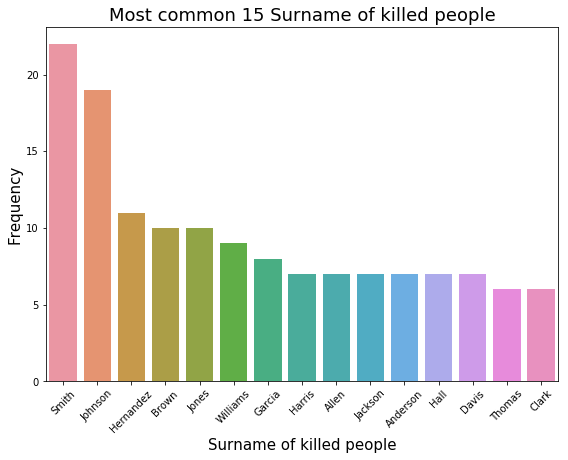

In [31]:
plt.figure(figsize=(8,6))
# make barplot
sns.barplot(x='index', y="Last Name", data=pairs)# set labels
plt.xlabel("Surname of killed people", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Most common 15 Surname of killed people", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=45);

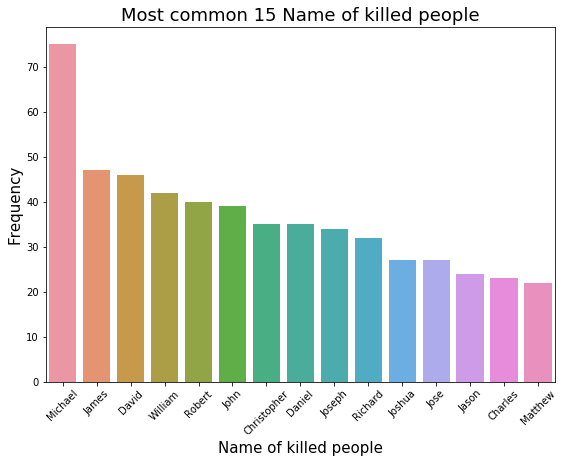

In [32]:
plt.figure(figsize=(8,6))
# make barplot
sns.barplot(x='index', y="First Name", data=pair)# set labels
plt.xlabel("Name of killed people", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Most common 15 Name of killed people", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=45);

## 3. Killed People According to Races (Pie Chart)

In [33]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Last Name
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,Hoffman
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,Rodriguez


In [34]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [36]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
First Name                 2486 non-null object
Last Name                  2486 non-null object
dtypes: bool(2), float64(1), int64(1), object(12)
memory usage: 282.3+ KB


Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [37]:
kill.dropna(inplace = True)

In [38]:
kill.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
First Name                 0
Last Name                  0
dtype: int64

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

In [39]:
killed = kill['race'].value_counts().reset_index()
killed.head(3)

,index,race
0,W,1168
1,B,592
2,H,400


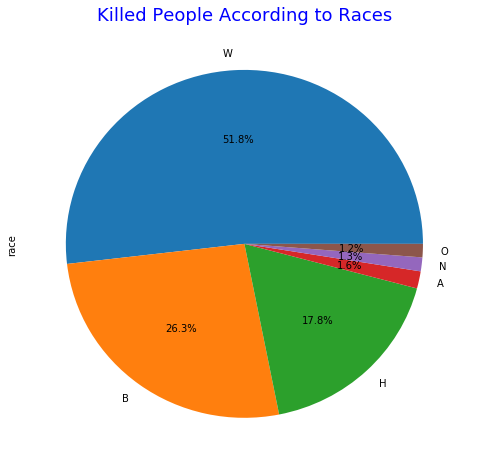

In [41]:
killed.plot(kind= 'pie',y='race',legend=False, figsize=(8, 8),labels= killed['index'],autopct='%1.1f%%')
plt.title("Killed People According to Races",color='blue', size=18)
plt.show()

## 4a.Box plot of age in both genders separeted by manner of death.

In [42]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Last Name
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,Elliot
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee Lembke
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul Quintero
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,Hoffman
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,Rodriguez


In [43]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

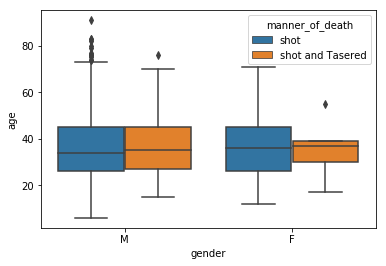

In [44]:
sns.boxplot(x='gender',y= 'age', hue='manner_of_death',data=kill)

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

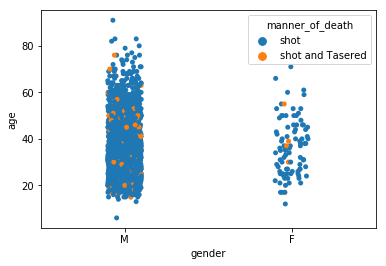

In [45]:
sns.stripplot(x='gender',y= 'age', hue='manner_of_death',data=kill)

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

Text(0.5,1,'gender')

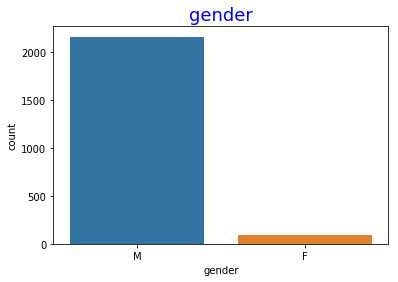

In [46]:
sns.countplot(x='gender',data=kill)
plt.title("gender",color='blue', size=18)

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [47]:
weapon=kill["armed"].value_counts().nlargest(7).reset_index()

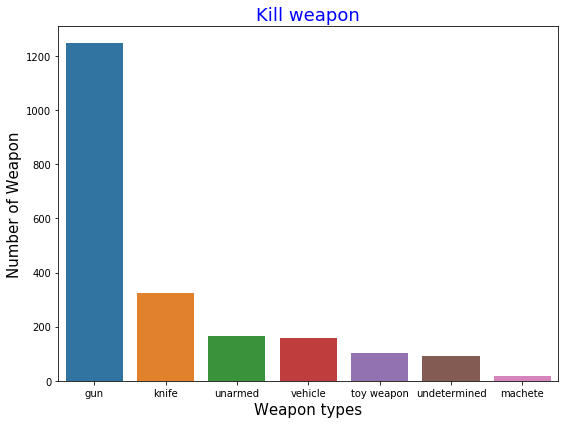

In [48]:
plt.figure(figsize=(8,6))
# make barplot
sns.barplot(x='index', y="armed", data=weapon)# set labels
plt.xlabel("Weapon types", size=15)
plt.ylabel("Number of Weapon", size=15)
plt.title("Kill weapon",color='blue', size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [49]:
kill['age_bins'] = pd.cut(x=kill['age'], bins=[0,25,99],labels=["below25", "above25"])

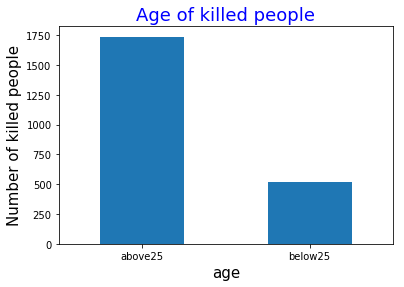

In [50]:
kill['age_bins'].value_counts().plot(kind='bar')
plt.xlabel("age", size=15)
plt.ylabel("Number of killed people", size=15)
plt.title("Age of killed people",color='blue', size=18)
plt.xticks(rotation=0);

**INSTRUCTION-4: Plot number of killed poeple by race**

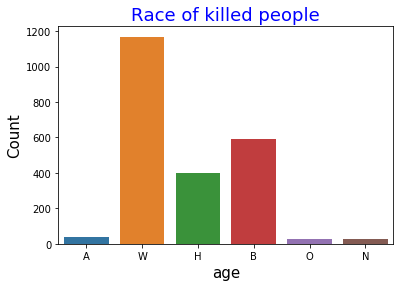

In [51]:
ax = sns.countplot(x="race", data=kill)
plt.xlabel("age", size=15)
plt.ylabel("Count", size=15)
plt.title("Race of killed people",color='blue', size=18)
plt.xticks(rotation=0);

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [52]:
pwd = kill["city"].value_counts().nlargest(12).reset_index()

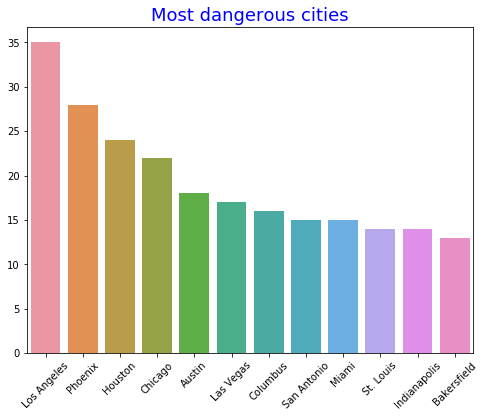

In [53]:
plt.figure(figsize=(8,6))
# make barplot
sns.barplot(x='index', y="city", data=pwd)# set labels
plt.xlabel("", size=15)
plt.ylabel("", size=15)
plt.title("Most dangerous cities",color='blue', size=18)
plt.xticks(rotation=45);

**INSTRUCTION-6: Plot 20 most dangerous states**

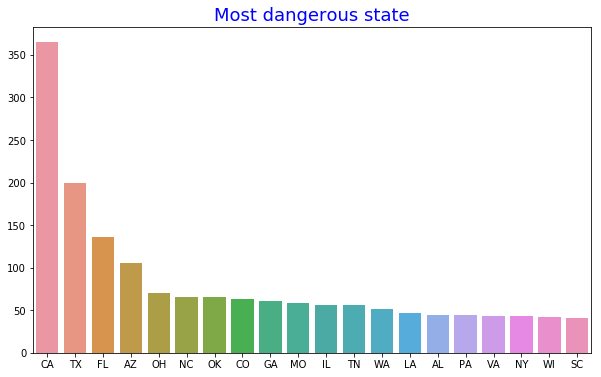

In [54]:
pw = kill["state"].value_counts().nlargest(20).reset_index()
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='index', y="state", data=pw)# set labels
plt.xlabel("", size=15)
plt.ylabel("", size=15)
plt.title("Most dangerous state",color='blue', size=18)
plt.xticks(rotation=0);

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

Text(0,0.5,'count')

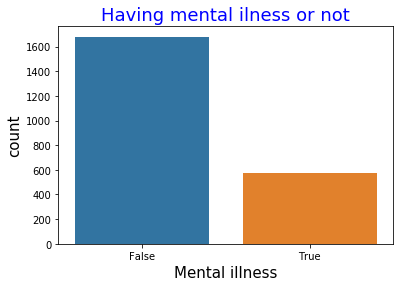

In [55]:
sns.countplot(x='signs_of_mental_illness',data=kill)
plt.title("Having mental ilness or not",color='blue', size=18)
plt.xlabel("Mental illness", size=15)
plt.ylabel("count", size=15)

**INSTRUCTION-8: Plot number of Threat Types**

Text(0,0.5,'count')

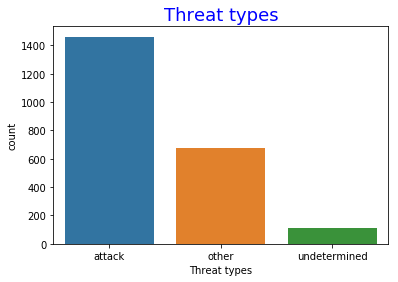

In [56]:
sns.countplot(x='threat_level',data=kill)
plt.title("Threat types",color='blue', size=18)
plt.xlabel("Threat types", size=10)
plt.ylabel("count", size=10)

**INSTRUCTION-9: Plot number of Flee Types**

Text(0,0.5,'count')

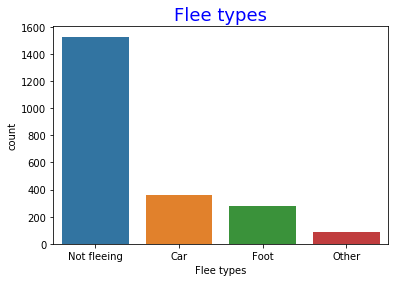

In [57]:
sns.countplot(x='flee',data=kill)
plt.title("Flee types",color='blue', size=18)
plt.xlabel("Flee types", size=10)
plt.ylabel("count", size=10)